<a href="https://colab.research.google.com/github/waraporn19/MatchingAI2021/blob/main/Tensorflow(network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Sequential ง่าย แต่สร้างได้แต่แบบไม่ซับซ้อน (วิ่งเป็นเส้นตรง)
2. Funtional  ยากขึ้นมาอีกนิด แต่สามารถปรับเส้นทาง,network ให้มีความซับซ้อนได้มากขึ้น

 ~3. Subclassing~ (ยากสุด แต่สามารถแก้ไขได้ตามที่เราต้องการ)


#The Sequential model


##import

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

##Defind
นิยามให้ตัว modle หน้าตาเป็นยังไง คือ k เป็นเท่าไหร่ โหวตยังไง วัดระยะอย่างไร

In [2]:
# Define Sequential model with 3 layers 
# ตัวนี้กำหนดให้เป็น keras แบบ Sequential 
model = keras.Sequential(
    [
        keras.Input(shape=(4,)),
        layers.Dense(2, activation="relu", name="layer1"), #กำหนดว่า layer คืออะไรบ้าง Dense คือ node ที่เราจะนำไปเชื่อมกับตัว input
        layers.Dense(3, activation="relu", name="layer2"), 
        layers.Dense(4, name="layer3"),
    ]
)

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 layer3 (Dense)              (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


##train (รวมกับการนำเข้าข้อมูลใน colab notebook หน้า)

##Predict

In [4]:
# Call layer on a test input
x = tf.ones((5, 4))
y = model(x)

In [5]:
x

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [6]:
y

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

สร้าง sequential แบบที่สอง

In [7]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(4,)))
model2.add(layers.Dense(2, activation="relu"))
model2.add(layers.Dense(3, activation="relu"))
model2.add(layers.Dense(4))

In [8]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


ปรับเปลี่ยน Network 

In [9]:
model2.pop()

In [10]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [11]:
model2.add(layers.Dense(6))

In [12]:
#ให้ data ไหลผ่าน
x = tf.ones((5, 4))
y = model2(x)

In [13]:
y #อันนี้คือ node สุดท้ายที่จะได้ออกมา 

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)>

ลองเทรน Sequentail model ที่สร้างเอง 

Convolutional Neural Network (CNN)

import

In [14]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [15]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [16]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0 #ปรับค่าให้สามารถเข้าไปใช้ใน neural network เฉยๆ 

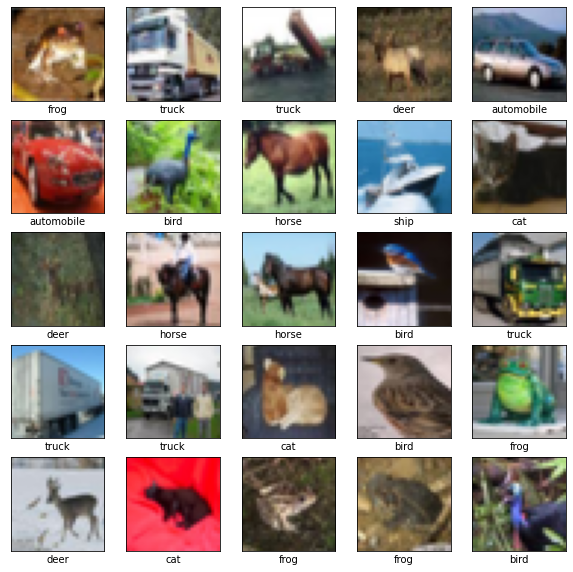

In [17]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Defind

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) #กว้าง 32 ยาว 32 มีเคเนล 3
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

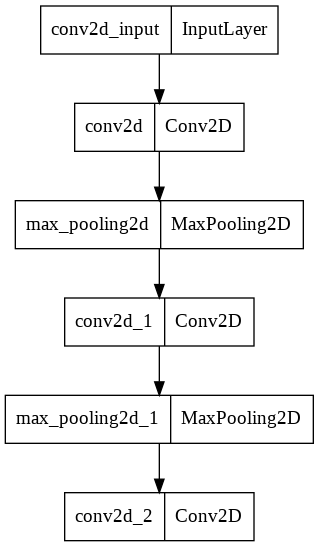

In [20]:
keras.utils.plot_model(model) 

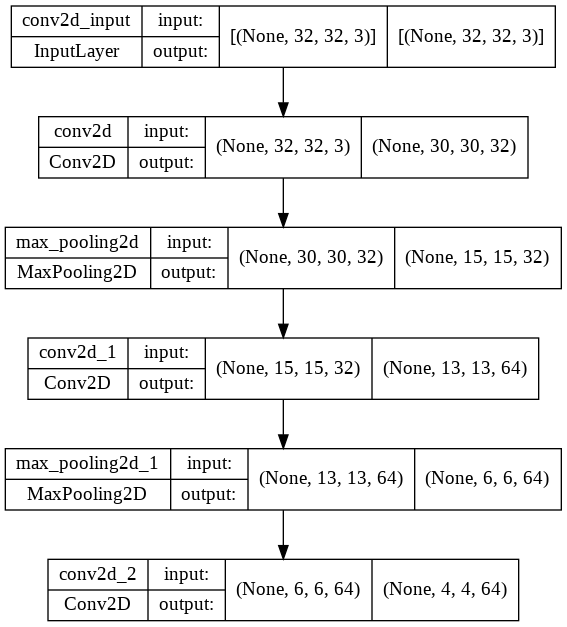

In [21]:
keras.utils.plot_model(model,show_shapes=True) 

ต่อด้วย flatten และ dense เพิ่้อทำนาย

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

train

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
history = model.fit(train_images, train_labels, epochs=2, 
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 23s 8ms/step - loss: 1.5330 - accuracy: 0.4393 - val_loss: 1.2167 - val_accuracy: 0.5578
Epoch 2/2
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1515 - accuracy: 0.5894 - val_loss: 1.0658 - val_accuracy: 0.6202


test

313/313 - 1s - loss: 1.0658 - accuracy: 0.6202 - 1s/epoch - 3ms/step


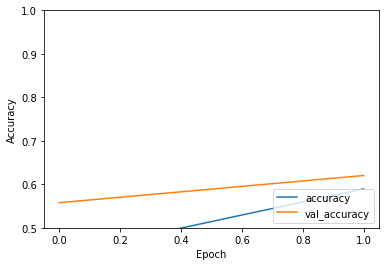

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [27]:
print(test_acc)

0.620199978351593


#Funtional

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [29]:
#ตัวอย่าง
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) #กว้าง 32 ยาว 32 มีเคเนล 3
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10))

In [30]:
input_image = keras.Input(shape=(32,32,3), name="img")
model = layers.Conv2D(32,(3,3),activation='relu', name="conv1")(input_image)
model = layers.MaxPooling2D((2,2), name="maxp1")(model)
model = layers.Conv2D(64,(3,3),activation='relu', name="conv2")(model)
model = layers.MaxPooling2D((2,2), name="maxp2")(model)
model = layers.Conv2D(64,(3,3),activation='relu', name="conv3")(model)
model = layers.Flatten()(model)
model = layers.Dense(64,activation='relu')(model)
output = layers.Dense(10)(model)

In [31]:
my_model = keras.Model(input_image, output, name="mymodel")

In [32]:
my_model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxp1 (MaxPooling2D)        (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxp2 (MaxPooling2D)        (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0   

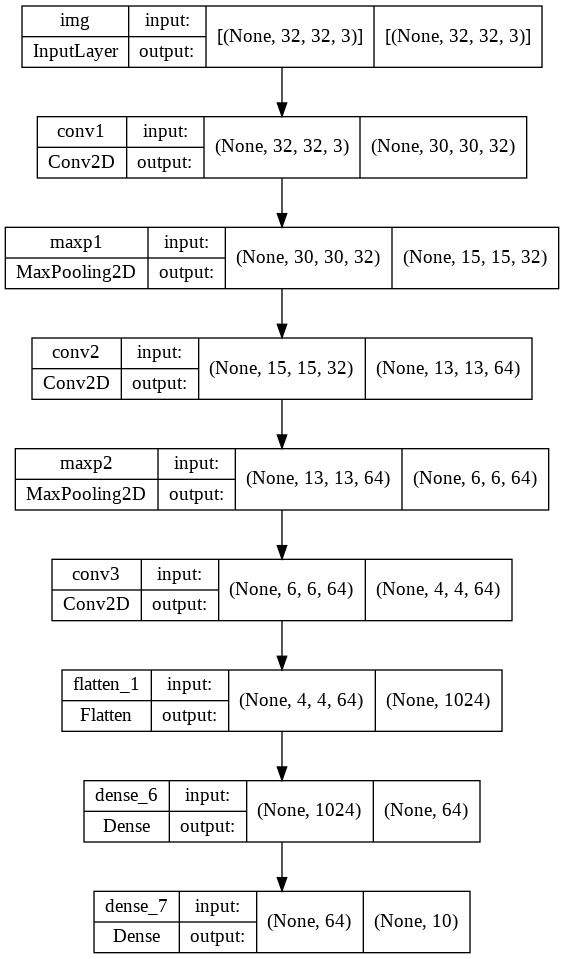

In [33]:
keras.utils.plot_model(my_model, "multi_input_and_output_model.png", show_shapes=True)

In [34]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
history = my_model.fit(train_images, train_labels, epochs=2, 
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 14s 8ms/step - loss: 1.5703 - accuracy: 0.4293 - val_loss: 1.2755 - val_accuracy: 0.5376
Epoch 2/2
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1842 - accuracy: 0.5807 - val_loss: 1.1656 - val_accuracy: 0.5853


313/313 - 1s - loss: 1.1656 - accuracy: 0.5853 - 1s/epoch - 3ms/step


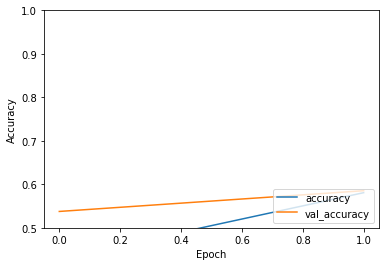

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [37]:
print(test_acc)

0.5853000283241272


#ResNet

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [39]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

resnet_model = keras.Model(inputs, outputs, name="toy_resnet")
resnet_model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_4 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d_3[0][0]']               
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_4[0][0]']               
                                                                                         

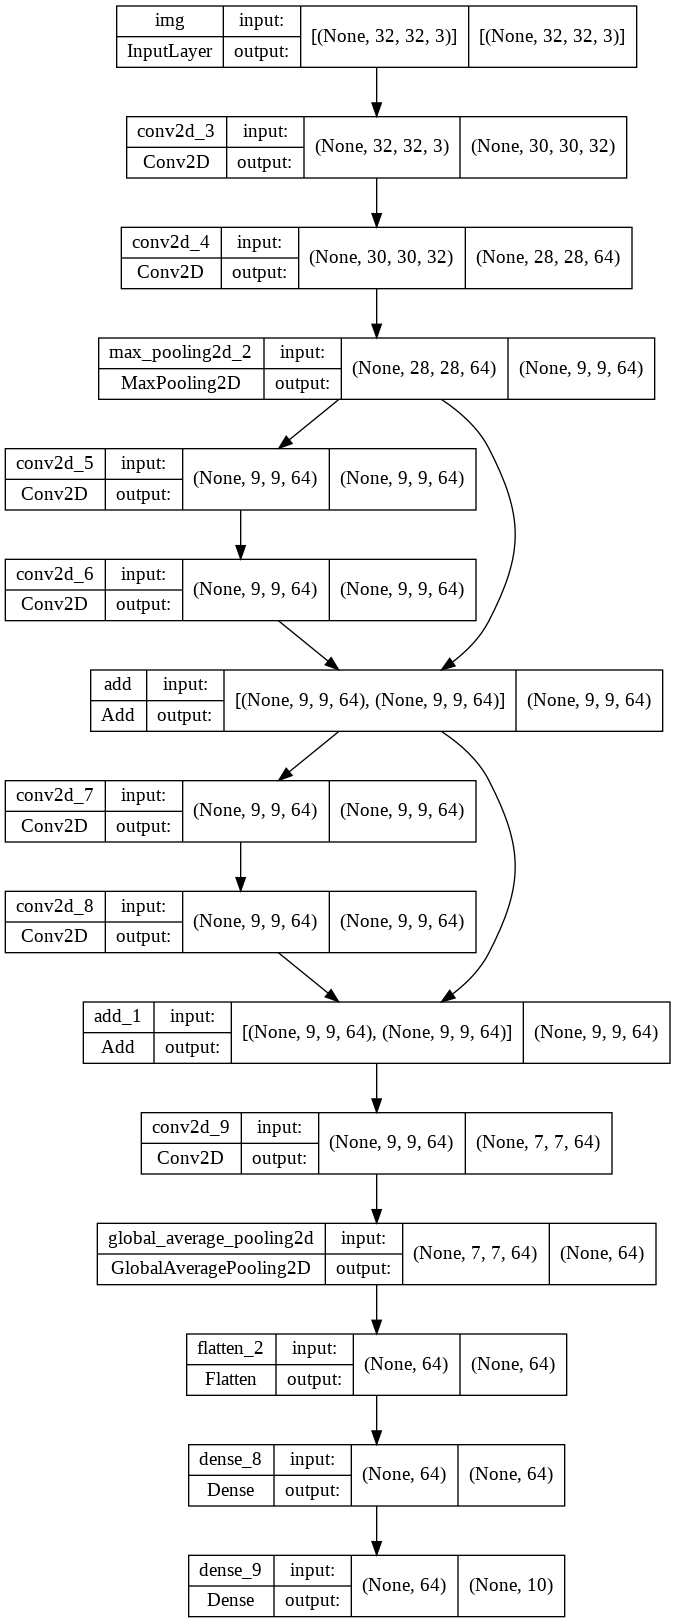

In [40]:
keras.utils.plot_model(resnet_model,show_shapes=True)

In [41]:
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
history2 = resnet_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.6265 - accuracy: 0.3810 - val_loss: 1.2946 - val_accuracy: 0.5171
Epoch 2/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1347 - accuracy: 0.5881 - val_loss: 1.0770 - val_accuracy: 0.6180
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9162 - accuracy: 0.6730 - val_loss: 0.9273 - val_accuracy: 0.6841
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7887 - accuracy: 0.7231 - val_loss: 0.7926 - val_accuracy: 0.7187
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7018 - accuracy: 0.7540 - val_loss: 0.7584 - val_accuracy: 0.7375
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6311 - accuracy: 0.7806 - val_loss: 0.7425 - val_accuracy: 0.7472
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5768 - accuracy: 0.7988 - val_loss: 0.6986 -

313/313 - 2s - loss: 0.7130 - accuracy: 0.7639 - 2s/epoch - 6ms/step


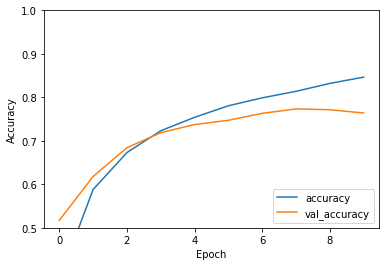

In [43]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = resnet_model.evaluate(test_images,  test_labels, verbose=2)

In [44]:
print(test_acc)

0.7638999819755554


#HW Modify my_model ให้มี skip connections แล้ว train test เทียบ my_model กับ resnet_moodel

In [45]:
my_input = keras.Input(shape=(32, 32, 3), name="img_2")
x = layers.Conv2D(32, 3, activation="relu")(my_input)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1 = layers.MaxPooling2D(2,2)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2= layers.add([x, block_1])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3 = layers.add([x, block_2])

x = layers.Conv2D(64, 3, activation="relu")(block_3)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)

my_output = layers.Dense(10)(x)

my_model = keras.Model(my_input, my_output, name="my_model")
my_model.summary()

Model: "my_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img_2 (InputLayer)             [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 30, 30, 32)   896         ['img_2[0][0]']                  
                                                                                                  
 conv2d_11 (Conv2D)             (None, 28, 28, 64)   18496       ['conv2d_10[0][0]']              
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 14, 14, 64)  0           ['conv2d_11[0][0]']              
                                                                                           

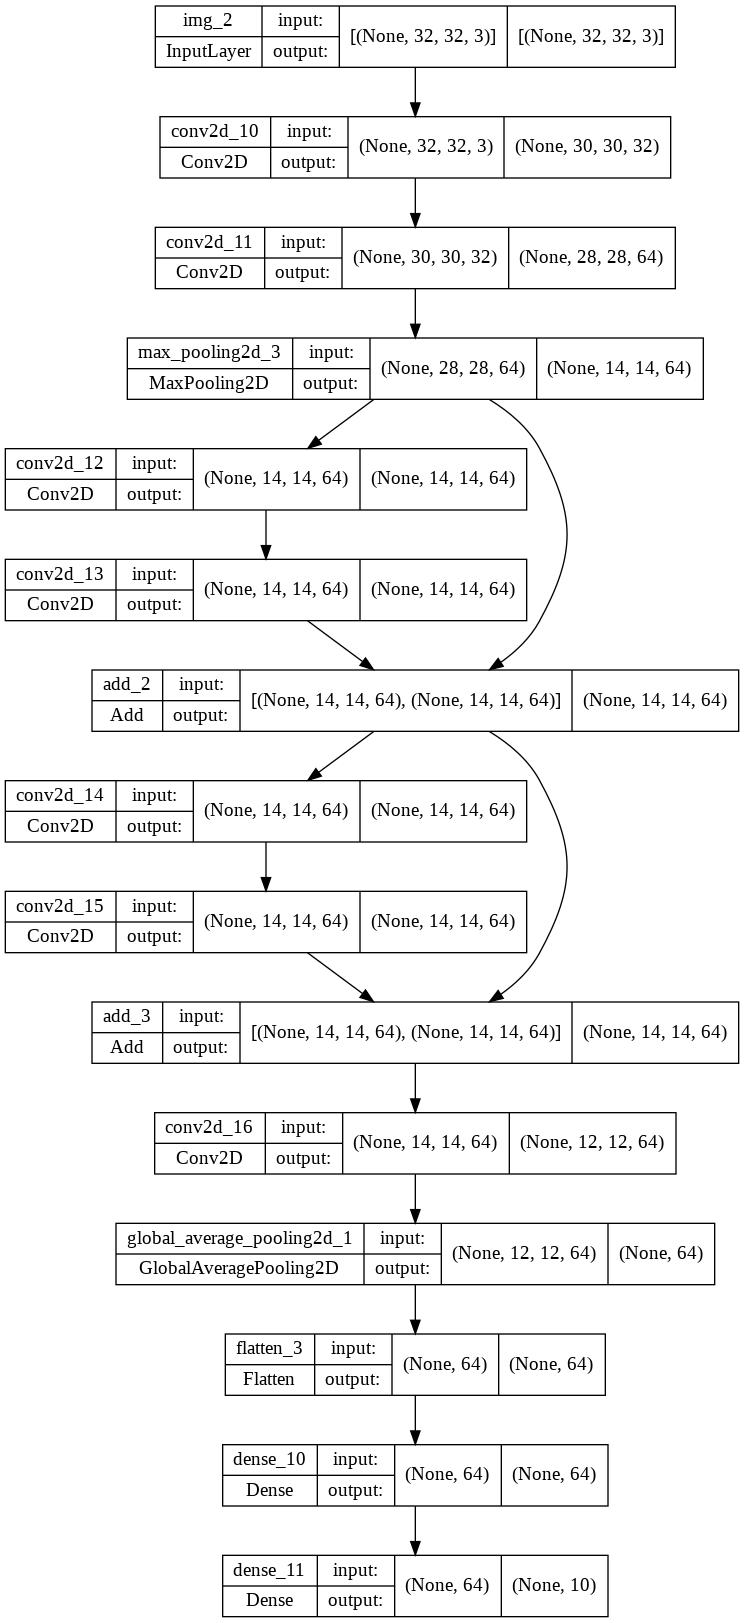

In [46]:
keras.utils.plot_model(my_model,show_shapes=True)

In [47]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
History = my_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 28s 17ms/step - loss: 1.6743 - accuracy: 0.3577 - val_loss: 1.3522 - val_accuracy: 0.4989
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2217 - accuracy: 0.5533 - val_loss: 1.1241 - val_accuracy: 0.5964
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0232 - accuracy: 0.6302 - val_loss: 0.9377 - val_accuracy: 0.6643
Epoch 4/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.8886 - accuracy: 0.6811 - val_loss: 0.8610 - val_accuracy: 0.6995
Epoch 5/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7860 - accuracy: 0.7197 - val_loss: 0.7904 - val_accuracy: 0.7174
Epoch 6/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7155 - accuracy: 0.7474 - val_loss: 0.7578 - val_accuracy: 0.7385
Epoch 7/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.6487 - accuracy: 0.7719 - val_loss: 0.7325 -

In [49]:
import numpy as np

313/313 - 2s - loss: 0.6744 - accuracy: 0.7665 - 2s/epoch - 6ms/step


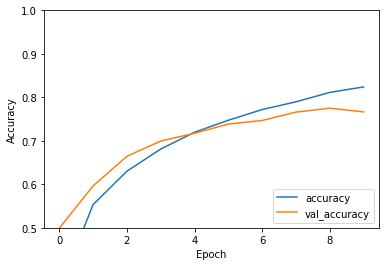

In [50]:
plt.plot(History.history['accuracy'], label='accuracy')
plt.plot(History.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss2, test_acc2 = my_model.evaluate(test_images, test_labels, verbose=2)

In [51]:
print(test_acc2)

0.7664999961853027
